In [136]:
import os
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
import tensorflow_addons as tfa

In [116]:
dir_training = "data/train"
dir_validation = "data/test"

In [117]:
# Configure tensorflow to generate training data from image directory, and normalize the image data
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(dir_training,
                                                   batch_size = 64,
                                                   class_mode='categorical',
                                                   color_mode='grayscale',
                                                   target_size=(48,48))

# Configure tensorflow to generate validation data from image directory, and normalize the image data
validation_datagen = ImageDataGenerator(rescale=1.0/255) 
validation_generator = validation_datagen.flow_from_directory(dir_validation,
                                                             batch_size = 64,
                                                             class_mode='categorical',
                                                             color_mode='grayscale',
                                                             target_size=(48,48))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [144]:
rectified_adam = tfa.optimizers.RectifiedAdam(learning_rate =0.001, decay=1e-5)
ranger = tfa.optimizers.Lookahead(rectified_adam,
                                  sync_period = 6,
                                  slow_step_size = 0.5)
mish = tfa.activations.mish
#deep neural network model for image classification
model = tf.keras.models.Sequential([
    # Alternating convolution and pooling layers to process the images before analysis
    # The convulation layers accent features from the images
    # The pooling layers reduce the amount of information to process
    tf.keras.layers.Conv2D(32,(3,3), activation = mish, input_shape = (48,48,1)),
    tf.keras.layers.Conv2D(64,(3,3), activation = mish),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128,(3,3), activation = mish),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation = mish),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    # Flatten the images for analysis by the nn
    tf.keras.layers.Flatten(),
    # neuron layers for image classification 512 neuron hidden layer, with a 7 nueron output layer
    tf.keras.layers.Dense(1024, activation = mish),
    tf.keras.layers.Dense(7, activation = 'softmax')])

model.compile(optimizer=ranger,
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                      epochs= 20,
                      verbose=1,
                      validation_data=validation_generator)

Epoch 1/20
449/449 [==============================] - 237s 521ms/step - loss: 1.7460 - acc: 0.2994 - val_loss: 1.6083 - val_acc: 0.3930
Epoch 2/20
449/449 [==============================] - 224s 498ms/step - loss: 1.5294 - acc: 0.4124 - val_loss: 1.5048 - val_acc: 0.4249
Epoch 3/20
449/449 [==============================] - 215s 478ms/step - loss: 1.4044 - acc: 0.4671 - val_loss: 1.3604 - val_acc: 0.4802
Epoch 4/20
449/449 [==============================] - 223s 496ms/step - loss: 1.3190 - acc: 0.5022 - val_loss: 1.2942 - val_acc: 0.5152
Epoch 5/20
449/449 [==============================] - 221s 492ms/step - loss: 1.2425 - acc: 0.5282 - val_loss: 1.2177 - val_acc: 0.5379
Epoch 6/20
449/449 [==============================] - 216s 480ms/step - loss: 1.1732 - acc: 0.5568 - val_loss: 1.1752 - val_acc: 0.5525
Epoch 7/20
449/449 [==============================] - 208s 464ms/step - loss: 1.0876 - acc: 0.5907 - val_loss: 1.1537 - val_acc: 0.5656
Epoch 8/20
449/449 [============================

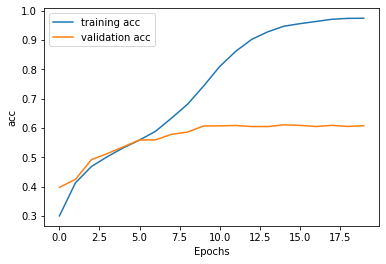

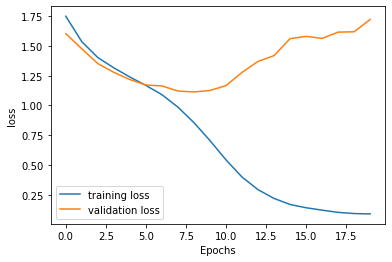

In [143]:
def plot_training(model_history, measure):
    plt.plot(model_history.history[measure])
    plt.plot(model_history.history['val_'+measure])
    plt.xlabel('Epochs')
    plt.ylabel(measure)
    plt.legend(['training '+ measure,'validation '+ measure])
    plt.show()
    
plot_training(history, 'acc')
plot_training(history, 'loss')

In [130]:
model.save('models/simple_model.h5')

In [133]:
model.save_weights('models/simple_model_weights.h5')